In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from reliability.Fitters import Fit_Weibull_2P
from fitter import Fitter
from scipy.stats import lognorm
import statsmodels.api as sm

In [3]:
import glob
path = 'Renewable Energy Data/Andhra Pradesh'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename,index_col=None, header=0,skiprows=2,usecols=[0,1,2,3,4,7])
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [4]:
frame['Date']=frame['Year'].astype(str) + frame['Month'].astype(str).str.zfill(2) + frame['Day'].astype(str).str.zfill(2) + frame['Hour'].astype(str).str.zfill(2)+frame['Minute'].astype(str)

frame['Date'] = pd.to_datetime(frame['Date'], format='%Y%m%d%H%M')

In [6]:
import datetime as dt

df_all = frame[['Date','GHI']]
df_all.set_index('Date',inplace=True)
df_all = df_all.between_time('09:00','15:00')

In [7]:
df_all.head()

,GHI
Date,
2001-01-01 09:00:00,509
2001-01-01 10:00:00,557
2001-01-01 11:00:00,619
2001-01-01 12:00:00,342
2001-01-01 13:00:00,500


In [8]:
y = df_all['GHI']

In [9]:
y.head()

Date
2001-01-01 09:00:00    509
2001-01-01 10:00:00    557
2001-01-01 11:00:00    619
2001-01-01 12:00:00    342
2001-01-01 13:00:00    500
Name: GHI, dtype: int64

((array([-4.13066373, -3.92204426, -3.80819367, ...,  3.80819367,
          3.92204426,  4.13066373]),
  array([   0,    0,    0, ..., 1045, 1046, 1055])),
 (189.67885091351764, 702.4503587736464, 0.9815373169815782))

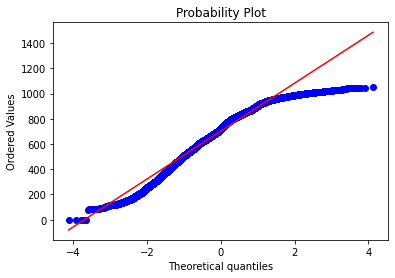

In [10]:
stats.probplot(y, dist="norm", plot=pylab)

In [11]:
f = Fitter(y)

In [12]:
f.fit()

,sumsquare_error,aic,bic,kl_div
beta,0.000008,1529.870496,-855914.316116,inf
genextreme,0.000008,1520.843829,-853947.561943,inf
dweibull,0.000009,1580.217479,-848146.768115,inf
dgamma,0.000011,1568.452956,-843152.004692,inf
loggamma,0.000011,1513.120197,-841979.690018,inf


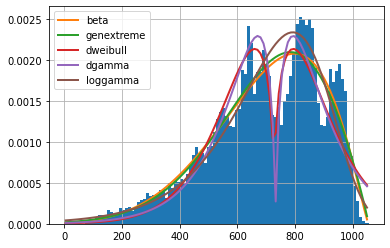

In [13]:
f.summary()

In [ ]:
#GIVING RUNTIME ERROR

# fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# probplot = sm.ProbPlot(np.log(y), fit=True)
# probplot.ppplot(line='45', ax=ax[0])
# probplot.qqplot(line='45', ax=ax[1])
# ax[0].set_title('P-P Plot')
# ax[1].set_title('Q-Q Plot')
# plt.show()

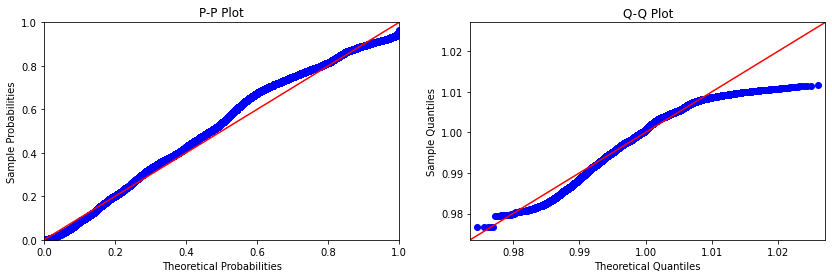

In [16]:
ig, ax = plt.subplots(1, 2, figsize=(14, 4))
probplot = sm.ProbPlot(y, dist=lognorm, fit=True)
probplot.ppplot(line='45', ax=ax[0])
probplot.qqplot(line='45', ax=ax[1])
ax[0].set_title('P-P Plot')
ax[1].set_title('Q-Q Plot')
plt.show()